In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# normal distribution calculator. return a list of y value calculated by normal distribution function
def normal_distribution(mu, sigma, X):
    Y = []
    for x in X:
        Y.append(1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)))

In [3]:
mu_tt = 24.12 # standard deviation of TT
sigma_tt = 3.87 # mean of TT 

# normal random generate 1000 synthetic samples
np. random. seed(201) #use np.random.seed for reproducibility
s_tt = np.random.normal(mu_tt, sigma_tt, 1000) 

In [4]:
def normal_distribution(mu, sigma, X):
    Y = []
    for x in X:
        Y.append(1/(sigma_tt * np.sqrt(2 * np.pi)) * np.exp( - (x - mu)**2 / (2 * sigma**2)))
    return Y

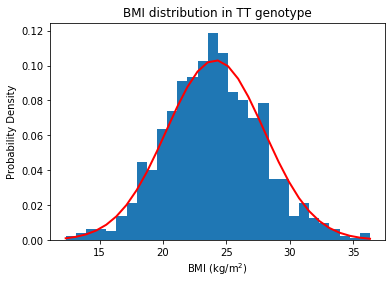

In [5]:
mu_tt = 24.12 # standard deviation of TT
sigma_tt = 3.87 # mean of TT 

# normal random generate 1000 synthetic samples
np. random. seed(201) #use np.random.seed for reproducibility
s_tt = np.random.normal(mu_tt, sigma_tt, 1000) 

# plot synthetic sample out
count, bins_tt, ignored = plt.hist(s_tt, bins=30, density=True) 
plt.plot(bins_tt, normal_distribution(mu_tt, sigma_tt, bins_tt), linewidth=2, color='red')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.title('BMI distribution in TT genotype')
plt.show()

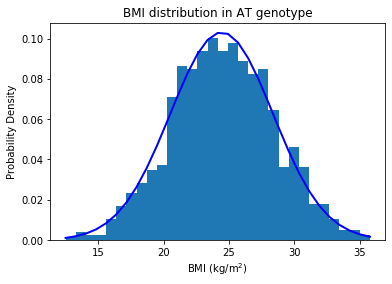

In [6]:
# repeat everything for AT genotype
mu_at = 24.43 # standard deviation of AT
sigma_at = 3.94 # mean of AT 

# normal random generate 1000 synthetic samples
np. random. seed(211) #use np.random.seed for reproducibility
s_at = np.random.normal(mu_at, sigma_at, 1000) 

# plot synthetic sample out
count, bins_at, ignored = plt.hist(s_at, bins=30, density=True)
plt.plot(bins_at, normal_distribution(mu_at, sigma_at, bins_at), linewidth=2, color='b')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.title('BMI distribution in AT genotype')
plt.show()

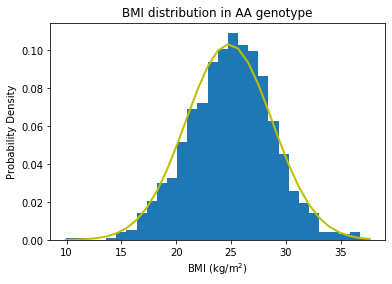

In [11]:
# repeate everthing for AA genotype
mu_aa = 24.82 # standard deviation of AA
sigma_aa = 3.95 # mean of AA 

# normal random generate 1000 synthetic samples
np. random. seed(221) #use np.random.seed for reproducibility
s_aa = np.random.normal(mu_aa, sigma_aa, 1000) 

# plot synthetic sample out
count, bins_aa, ignored = plt.hist(s_aa, bins=30, density=True)
plt.plot(bins_aa, normal_distribution(mu_aa, sigma_aa, bins_aa), linewidth=2, color='y')
plt.xlabel('BMI (kg/m$^2$)')
plt.ylabel('Probability Density')
plt.title('BMI distribution in AA genotype')
plt.show()

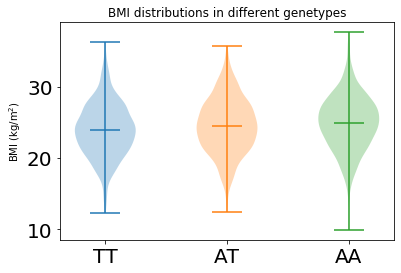

In [77]:
plt.violinplot(s_tt,positions=[1], showmeans=True)
plt.violinplot(s_at,positions=[2], showmeans=True)
plt.violinplot(s_aa,positions=[3], showmeans=True)
plt.ylabel('BMI (kg/m$^2$)')
plt.xticks([1,2,3],['TT','AT','AA'])
plt.title('BMI distributions in different genetypes')
plt.show()

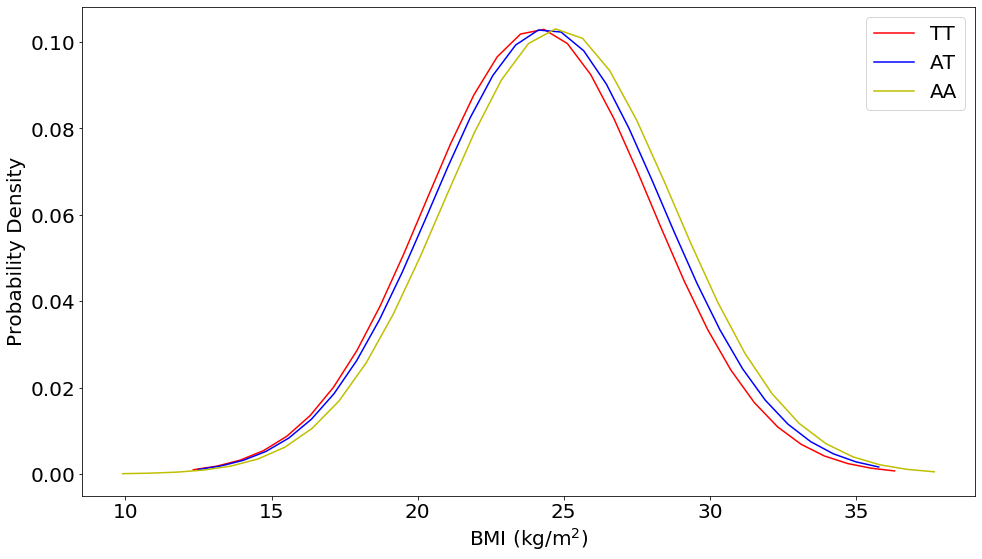

In [33]:
plt.figure(figsize=(16,9)) 

plt.plot(bins_tt, normal_distribution(mu_tt, sigma_tt, bins_tt), color='r', label = 'TT')
plt.plot(bins_at, normal_distribution(mu_at, sigma_at, bins_at), color='b', label = 'AT')
plt.plot(bins_aa, normal_distribution(mu_aa, sigma_aa, bins_aa), color='y', label = 'AA')

plt.xlabel('BMI (kg/m$^2$)', fontsize=20)
plt.ylabel('Probability Density', fontsize=20)

plt.legend(fontsize=20)

plt.show()

In [73]:
# functions to find intercpet of two normal distribution curve
def solve(mu1,mu2,sigma1,sigma2):
    a = 1/(2*sigma1**2) - 1/(2*sigma2**2)
    b = mu2/(sigma2**2) - mu1/(sigma1**2)
    c = mu1**2 /(2*sigma1**2) - mu2**2 / (2*sigma2**2) - np.log(sigma2/sigma1)
    return np.roots([a,b,c])

In [74]:
# calculate overlpae area
def nordist_overlape(mu1, sigma1, mu2, sigma2):
    result = solve(mu1,mu2,sigma1,sigma2)
    r = result[0]
    area = norm.cdf(r,mu2,sigma2) + (1.-norm.cdf(r,mu1,sigma1))
    return area

In [92]:
## AT v.s TT
o1 = nordist_overlape (mu_tt, sigma_tt, mu_at, sigma_at)
print ('Overlape of AT to TT is', o1)

Overlape of TT to AT is 0.9675599121821948


In [93]:
## AA v.s TT
o2 = nordist_overlape (mu_tt, sigma_tt, mu_aa, sigma_aa)
print ('Overlape of AA to TT is', o2)

Overlape of AA to TT is 0.9282132729300252
